https://totoma3.tistory.com/201

https://github.com/ralaruri/p_median_python

https://dacon.io/codeshare/1358

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 155629 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = mpl.font_manager.FontProperties(fname=path).get_name()
mpl.rc('font', family=font_name)
mpl.font_manager._rebuild()

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_excel('/content/drive/Shareddrives/데마 팀플 2/텀프로젝트/통합 Data/노인data.xlsx')   #데이터셋 불러오기

In [ ]:
df.shape

In [ ]:
df.head()

,시군구,노인 수(2021.05),노인빈곤 순위 소계,빈곤율,"1인당 GRDP (만원,2016)"
0,가평군,16626.0,99.0,27.3,2517.0
1,고양시,149289.0,84.0,14.8,1875.0
2,과천시,9694.0,25.0,8.4,4600.0
3,광명시,42123.0,76.0,15.3,1964.0
4,광주시,52902.0,24.0,9.1,2359.0


In [ ]:
a = df['시군구'].values.tolist()

In [ ]:
df=df.drop(['시군구'],axis=1)

In [ ]:
df

,노인 수(2021.05),노인빈곤 순위 소계,빈곤율,"1인당 GRDP (만원,2016)"
0,16626.0,99.0,27.3,2517.0
1,149289.0,84.0,14.8,1875.0
2,9694.0,25.0,8.4,4600.0
3,42123.0,76.0,15.3,1964.0
4,52902.0,24.0,9.1,2359.0
5,27339.0,59.0,18.1,2082.0
6,37160.0,24.0,11.3,2185.0
7,60157.0,100.0,15.9,2393.0
8,103718.0,101.0,20.8,1309.0
9,19381.0,49.0,30.7,1680.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(df)

In [ ]:
scaled = pd.DataFrame(scaled, columns = df.columns)
scaled.describe() # 기초통계량

,노인 수(2021.05),노인빈곤 순위 소계,빈곤율,"1인당 GRDP (만원,2016)"
count,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01
mean,-1.432546e-17,1.074409e-17,-2.865092e-16,1.289291e-16
std,1.016530e+00,1.016530e+00,1.016530e+00,1.016530e+00
min,-1.205545e+00,-1.640231e+00,-1.561834e+00,-1.181565e+00
25%,-7.386196e-01,-8.049281e-01,-6.420093e-01,-6.398249e-01
50%,-4.070886e-01,-6.074929e-02,-2.400117e-01,-2.954148e-01
75%,4.155712e-01,8.808647e-01,8.365243e-01,3.402216e-01
max,2.231519e+00,1.670605e+00,2.335499e+00,3.784689e+00


In [ ]:
data_prime = scaled.copy()

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
clusters = linkage(y=data_prime, method='complete', metric='euclidean')

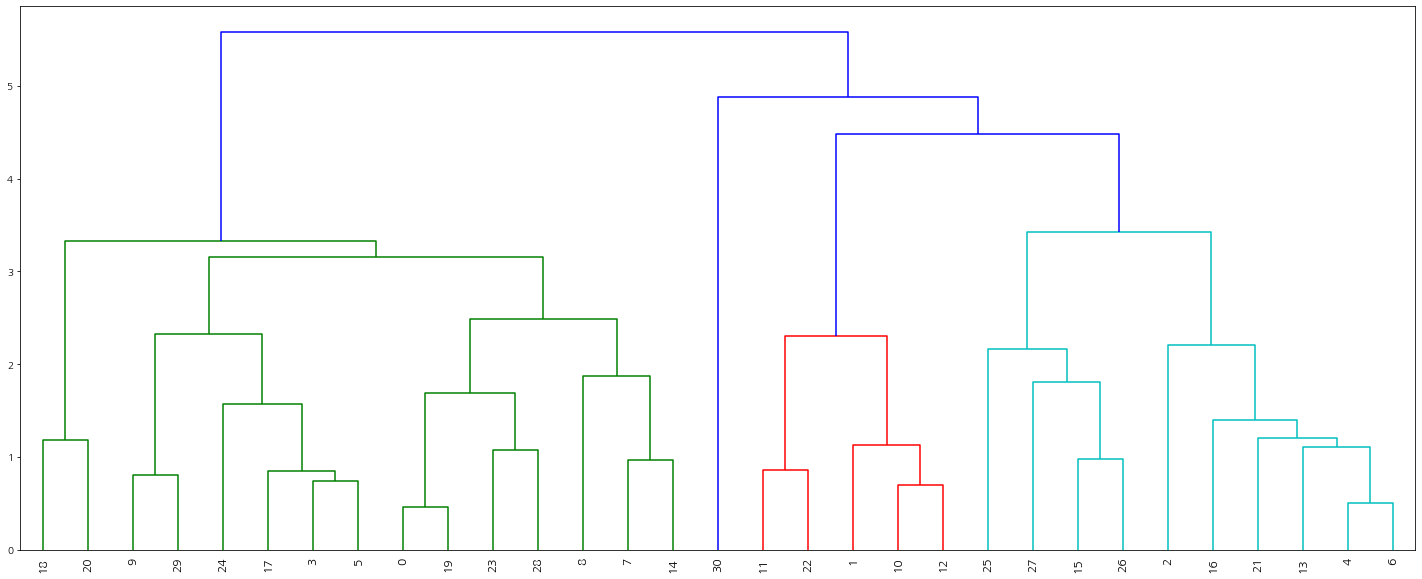

In [ ]:
import matplotlib.pyplot as plt
plt.figure( figsize = (25, 10) )
dendrogram(clusters, leaf_rotation=90, leaf_font_size=12,)
plt.show()

In [ ]:
cut_tree = fcluster(clusters, t=4, criterion='distance')
cut_tree

array([1, 2, 3, 1, 3, 1, 3, 1, 1, 1, 2, 2, 2, 3, 1, 3, 3, 1, 1, 1, 1, 3,
       2, 1, 1, 3, 3, 3, 1, 1, 4], dtype=int32)

In [ ]:
pd.Series(cut_tree).value_counts()

1    15
3    10
2     5
4     1
dtype: int64

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(data_prime, cut_tree)
print('Silhouette Score:', score_samples[:5], '\nSilhouette Score shape:', score_samples.shape, '\n')

average_score = silhouette_score(data_prime, cut_tree)
# np.mean(score_samples) == average_score: True
print('Silhouette Average Score:{0:.3f}'.format(average_score))

Silhouette Score: [0.39556265 0.47857683 0.32171652 0.1962547  0.18047795] 
Silhouette Score shape: (31,) 

Silhouette Average Score:0.225


In [ ]:
data_prime['hc_cluster'] = cut_tree
data_prime['silhouette_coeff'] = score_samples
data_prime

,노인 수(2021.05),노인빈곤 순위 소계,빈곤율,"1인당 GRDP (만원,2016)",hc_cluster,silhouette_coeff
0,-1.034868,1.063113,1.013676,-0.295415,1,0.395563
1,2.231519,0.607493,-0.689704,-0.766365,2,0.478577
2,-1.205545,-1.184611,-1.561834,1.232607,3,0.321717
3,-0.407089,0.364496,-0.621569,-0.701078,1,0.196255
4,-0.141691,-1.214986,-1.466445,-0.411319,3,0.180478
5,-0.771096,-0.151873,-0.240012,-0.614517,1,0.092195
6,-0.529286,-1.214986,-1.166650,-0.538959,3,0.287680
7,0.036939,1.093487,-0.539807,-0.386377,1,0.293099
8,1.109484,1.123862,0.127918,-1.181565,1,-0.045334
9,-0.967035,-0.455620,1.476995,-0.909411,1,0.225484


In [ ]:
# 군집별 평균 silhouette_score 값
print(data_prime.groupby('hc_cluster')['silhouette_coeff'].mean())
print('표준편차:', data_prime.groupby('hc_cluster')['silhouette_coeff'].mean().std())

hc_cluster
1    0.220376
2    0.512995
3    0.109432
4    0.000000
Name: silhouette_coeff, dtype: float64
표준편차: 0.22070003710219793


In [ ]:
cluster_g = data_prime.groupby('hc_cluster')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = mpl.font_manager.FontProperties(fname=path).get_name()
mpl.rc('font', family=font_name)
mpl.font_manager._rebuild()

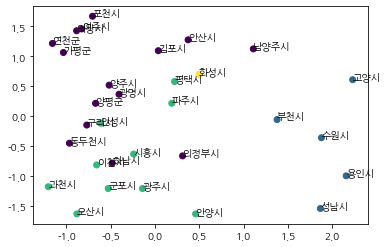

In [ ]:
import seaborn as ans
import matplotlib.pyplot as plt
x = data_prime['노인 수(2021.05)']
y = data_prime['노인빈곤 순위 소계']
n = a

fig, ax = plt.subplots()
ax.scatter(x, y, c=data_prime['hc_cluster'])

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

No handles with labels found to put in legend.


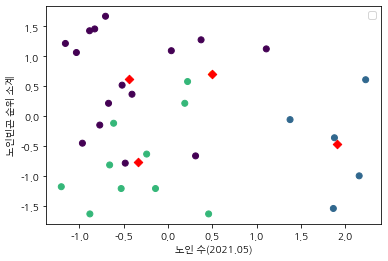

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
 

plt.scatter(x=data_prime['노인 수(2021.05)'], y=data_prime['노인빈곤 순위 소계'], c=data_prime['hc_cluster']) # 각 cluster 좌푯값 시각화

hc_centers = np.array(cluster_g.mean()) # 각 cluster별 centroid
plt.scatter(x=hc_centers[:,0], y=hc_centers[:,1], marker='D', c='r') # 각 cluster별 centroid 시각화
# marker='D', c='r' : 마커 모양은 Diamond, 색깔은 red
plt.xlabel('노인 수(2021.05)')
plt.ylabel('노인빈곤 순위 소계')
plt.legend()
plt.show()

# K Means 클러스터링

In [ ]:
data_prime = scaled.copy()

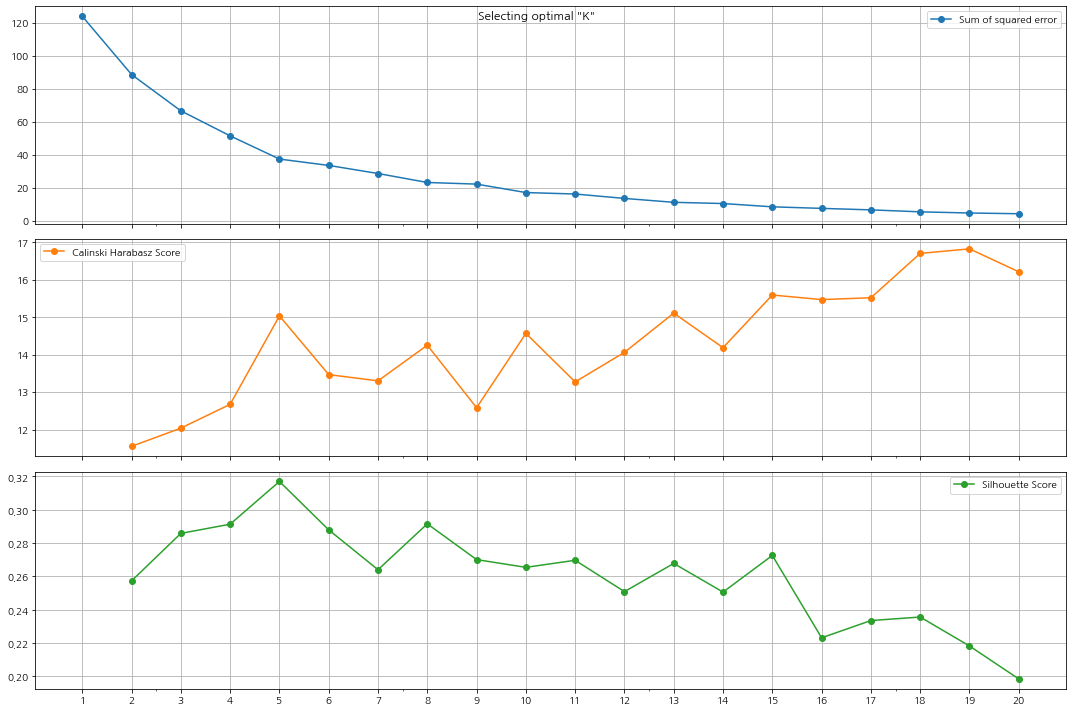

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt

search_range = range(1, 21)
report = {}
for k in search_range:
    temp_dict = {}
    kmeans = KMeans(init='k-means++',
                    algorithm='auto',
                    n_clusters=k,
                    max_iter=1000,
                    random_state=1,
                    verbose=0).fit(data_prime)
    inertia = kmeans.inertia_
    temp_dict['Sum of squared error'] = inertia
    try:
        cluster = kmeans.predict(data_prime)
        chs = calinski_harabasz_score(data_prime, cluster)
        ss = silhouette_score(data_prime, cluster)
        temp_dict['Calinski Harabasz Score'] = chs
        temp_dict['Silhouette Score'] = ss
        report[k] = temp_dict
    except:
        report[k] = temp_dict

report_df = pd.DataFrame(report).T
report_df.plot(figsize=(15, 10),
               xticks=search_range,
               grid=True,
               title=f'Selecting optimal "K"',
               subplots=True,
               marker='o',
               sharex=True)
plt.tight_layout()

In [ ]:
from sklearn.cluster import KMeans
'''
init: {'k-means++', 'random'}, default='k-means++'
algorithm: {'auto', 'full', 'elkan'}, default='auto'
'''

model = KMeans(n_clusters=5, random_state=312, algorithm='auto')
model.fit(data_prime)

KMeans(n_clusters=5, random_state=312)

In [ ]:
# 각 군집(cluster) 표시
pred = model.predict(data_prime)
pred

array([0, 2, 1, 4, 1, 4, 1, 4, 4, 0, 2, 2, 2, 1, 4, 0, 1, 4, 0, 0, 0, 1,
       2, 4, 1, 3, 0, 3, 4, 0, 3], dtype=int32)

In [ ]:
# 군집별 centroids의 좌표값
centroids = model.cluster_centers_
centroids = pd.DataFrame(centroids, columns = data_prime.columns)

In [ ]:
centroids

array([[-9.23571542e-01,  9.87175956e-01,  1.67799395e+00,
        -4.31124874e-01],
       [-3.79865220e-01, -6.37867541e-01,  8.59236059e-01,
        -7.92040213e-01],
       [ 2.03332234e-01,  1.29092240e+00, -2.33198190e-01,
        -2.01151380e-01],
       [-2.16135114e-01, -3.79683060e-02,  7.75202655e-01,
         1.17850619e+00],
       [ 1.90269636e+00, -4.73844459e-01, -6.18843379e-01,
        -2.65778700e-01],
       [ 4.97487513e-01,  6.98616831e-01, -5.26179517e-01,
         3.78468906e+00],
       [-4.23806722e-01, -1.25548532e+00, -1.07580340e+00,
        -3.33260624e-03],
       [-6.45758907e-01,  5.39149945e-01, -3.45621258e-01,
        -5.61149760e-01]])

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
data_prime['k_means_cluster'] = pred
data_prime['k_silhouette_coeff'] = silhouette_samples(data_prime, data_prime['k_means_cluster'])

k_average_score = silhouette_score(data_prime, data_prime['k_means_cluster'])
print('Average Silhouette Score:{0:.3f}'.format(k_average_score))

Average Silhouette Score:0.471


In [ ]:
# 군집별 평균 silhouette_score 값
data_prime.groupby('k_means_cluster')['k_silhouette_coeff'].mean()

k_means_cluster
0    0.477605
1    0.450853
2    0.502734
3    0.283689
4    0.535602
Name: k_silhouette_coeff, dtype: float64

In [ ]:
centroids

,노인 수(2021.05),노인빈곤 순위 소계,빈곤율,"1인당 GRDP (만원,2016)"
0,-0.696283,0.349308,1.454851,-0.251584
1,-0.318859,-1.171593,-0.913577,-0.130467
2,1.902696,-0.473844,-0.618843,-0.265779
3,0.019499,0.151873,0.055241,2.434680
4,-0.221213,0.915036,-0.289410,-0.381151


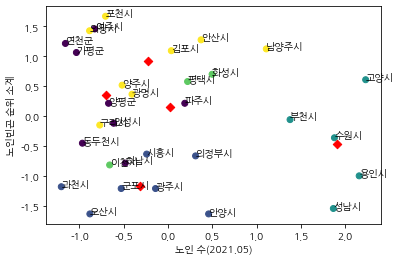

In [ ]:
import seaborn as ans
import matplotlib.pyplot as plt
x = data_prime['노인 수(2021.05)']
y = data_prime['노인빈곤 순위 소계']
n = a

fig, ax = plt.subplots()
ax.scatter(x, y, c=data_prime['k_means_cluster'])
ax.scatter(x=centroids.iloc[:,0], y=centroids.iloc[:,1], marker='D', c='r') # x, y는 각각 factor 1번째(0)와 4번째(3)
plt.xlabel('노인 수(2021.05)')
plt.ylabel('노인빈곤 순위 소계')

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

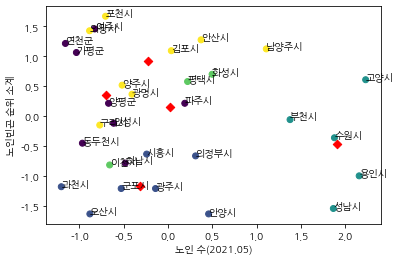

In [ ]:
import seaborn as ans
import matplotlib.pyplot as plt
x = data_prime['노인 수(2021.05)']
y = data_prime['노인빈곤 순위 소계']
n = a

fig, ax = plt.subplots()
ax.scatter(x, y, c=data_prime['k_means_cluster'])
ax.scatter(x=centroids.iloc[:,0], y=centroids.iloc[:,1], marker='D', c='r') # x, y는 각각 factor 1번째(0)와 4번째(3)
plt.xlabel('노인 수(2021.05)')
plt.ylabel('노인빈곤 순위 소계')

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

Text(0, 0.5, '노인빈곤 순위 소계')

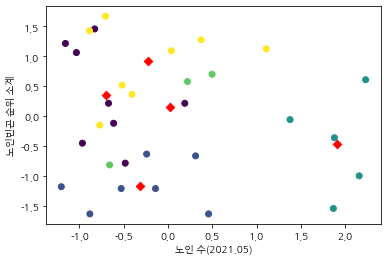

In [ ]:
# 군집결과 시각화
plt.scatter(x=data_prime['노인 수(2021.05)'], y=data_prime['노인빈곤 순위 소계'], c=data_prime['k_means_cluster'])
plt.scatter(x=centroids.iloc[:,0], y=centroids.iloc[:,1], marker='D', c='r') # x, y는 각각 factor 1번째(0)와 4번째(3)
plt.xlabel('노인 수(2021.05)')
plt.ylabel('노인빈곤 순위 소계')

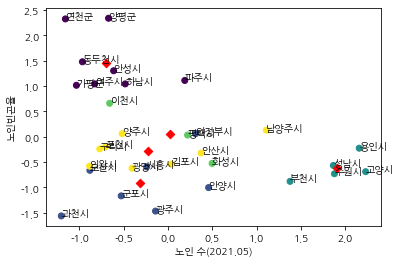

In [ ]:
import seaborn as ans
import matplotlib.pyplot as plt
x = data_prime['노인 수(2021.05)']
y = data_prime['빈곤율']
n = a

fig, ax = plt.subplots()
ax.scatter(x, y, c=data_prime['k_means_cluster'])
ax.scatter(x=centroids.iloc[:,0], y=centroids.iloc[:,2], marker='D', c='r') # x, y는 각각 factor 1번째(0)와 4번째(3)
plt.xlabel('노인 수(2021.05)')
plt.ylabel('노인빈곤율')

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

In [ ]:
from sklearn.cluster import KMeans
'''
init: {'k-means++', 'random'}, default='k-means++'
algorithm: {'auto', 'full', 'elkan'}, default='auto'
'''

model = KMeans(n_clusters=8, random_state=312, algorithm='auto')
model.fit(data_prime)

KMeans(random_state=312)

In [ ]:
# 각 군집(cluster) 표시
pred = model.predict(data_prime)
pred

array([0, 4, 6, 7, 6, 7, 6, 2, 2, 1, 4, 4, 4, 6, 2, 3, 6, 7, 0, 0, 0, 6,
       4, 7, 1, 3, 3, 3, 2, 1, 5], dtype=int32)

In [ ]:
# 군집별 centroids의 좌표값
centroids = model.cluster_centers_
centroids = pd.DataFrame(centroids, columns = data_prime.columns)

In [ ]:
centroids

,노인 수(2021.05),노인빈곤 순위 소계,빈곤율,"1인당 GRDP (만원,2016)"
0,-0.923572,0.987176,1.677994,-0.431125
1,-0.379865,-0.637868,0.859236,-0.792040
2,0.203332,1.290922,-0.233198,-0.201151
3,-0.216135,-0.037968,0.775203,1.178506
4,1.902696,-0.473844,-0.618843,-0.265779
5,0.497488,0.698617,-0.526180,3.784689
6,-0.423807,-1.255485,-1.075803,-0.003333
7,-0.645759,0.539150,-0.345621,-0.561150


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
data_prime['k_means_cluster'] = pred
data_prime['k_silhouette_coeff'] = silhouette_samples(data_prime, data_prime['k_means_cluster'])

k_average_score = silhouette_score(data_prime, data_prime['k_means_cluster'])
print('Average Silhouette Score:{0:.3f}'.format(k_average_score))

Average Silhouette Score:0.443


In [ ]:
# 군집별 평균 silhouette_score 값
data_prime.groupby('k_means_cluster')['k_silhouette_coeff'].mean()

k_means_cluster
0    0.442885
1    0.406805
2    0.411986
3    0.372429
4    0.552316
5    0.000000
6    0.441710
7    0.560876
Name: k_silhouette_coeff, dtype: float64

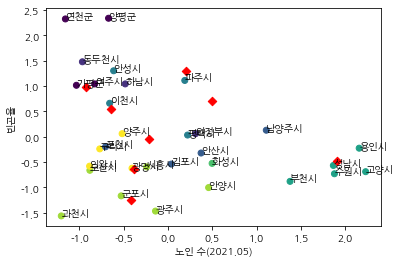

In [ ]:
import seaborn as ans
import matplotlib.pyplot as plt
x = data_prime['노인 수(2021.05)']
y = data_prime['빈곤율']
n = a

fig, ax = plt.subplots()
ax.scatter(x, y, c=data_prime['k_means_cluster'])
ax.scatter(x=centroids.iloc[:,0], y=centroids.iloc[:,1], marker='D', c='r') # x, y는 각각 factor 1번째(0)와 4번째(3)
plt.xlabel('노인 수(2021.05)')
plt.ylabel('빈곤율')

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))